In [24]:
import numpy as np

In [25]:
data = np.array([1, 2, 3, 4, 5])

In [26]:
num_samples = 1000

In [27]:
def calculate_statistic(data):
    return np.mean(data)

In [28]:
bootstrap_means = np.zeros(num_samples)

In [29]:
for i in range(num_samples):
    bootstrap_sample = np.random.choice(data, size=4, replace=True)
    bootstrap_means[i] = calculate_statistic(bootstrap_sample)

In [30]:
bootstrap_mean = np.mean(bootstrap_means)
bootstrap_std_error = np.std(bootstrap_means)

In [31]:
print(f'Bootstrap Mean: {bootstrap_mean}')
print(f'Standard Error: {bootstrap_std_error}')

Bootstrap Mean: 3.00625
Standard Error: 0.7238946314899704


# Case Study of Bootstrapping

In [1]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np 
import pandas as pd

In [2]:
trainData = pd.read_csv('train.csv')

In [3]:
trainData.info()

trainData.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')   
trainData['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
trainData['OpenDays'] = trainData['OpenDays'].dt.days.astype(int)

trainData = trainData.drop('Open Date', axis=1)

In [5]:
trainData['OpenDays']

0      6743
1      3609
2      1759
3      2160
4      3159
       ... 
132    3477
133    4099
134    4195
135    2621
136    3044
Name: OpenDays, Length: 137, dtype: int32

<Axes: xlabel='City Group', ylabel='revenue'>

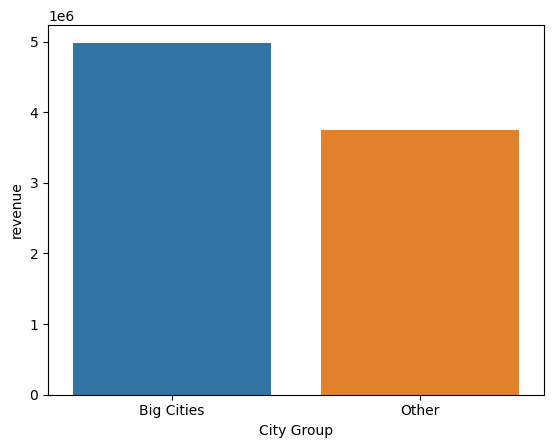

In [6]:
cityPerc = trainData[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=cityPerc)

<Axes: xlabel='City', ylabel='revenue'>

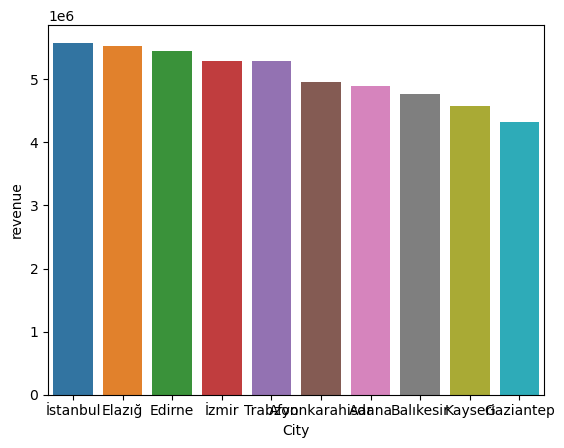

In [7]:
cityPerc = trainData[["City", "revenue"]].groupby(['City'],as_index=False).mean()

newDF = cityPerc.sort_values(["revenue"],ascending=False)
sns.barplot(x='City', y='revenue', data=newDF.head(10))

In [8]:
cityPerc

,City,revenue
0,Adana,4.894944e+06
1,Afyonkarahisar,4.952497e+06
2,Amasya,2.954086e+06
3,Ankara,3.275406e+06
4,Antalya,3.481448e+06
5,Aydın,3.429798e+06
6,Balıkesir,4.758476e+06
7,Bolu,4.263629e+06
8,Bursa,4.092295e+06
9,Denizli,2.344689e+06


In [9]:
trainData['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [10]:
trainData = trainData.drop('Id', axis=1)
trainData = trainData.drop('Type', axis=1)

In [11]:
citygroupDummy = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(citygroupDummy)


trainData = trainData.drop('City Group', axis=1)

trainData = trainData.drop('City', axis=1)

tempRev = trainData['revenue']
trainData = trainData.drop('revenue', axis=1)

trainData = trainData.join(tempRev)

In [12]:
trainData.head(10)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P32,P33,P34,P35,P36,P37,OpenDays,Big Cities,Other,revenue
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,4,5,5,4,3,4,6743,True,False,5653753.0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,3609,True,False,6923131.0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,1759,False,True,2055379.0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,10,6,18,12,12,6,2160,False,True,2675511.0
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,3,2,3,4,3,3,3159,False,True,4316715.0
5,6,6.0,4.5,7.5,8,10,10,8,8,8,...,0,0,0,0,0,0,2880,True,False,5017319.0
6,2,3.0,4.0,4.0,1,5,5,5,5,5,...,2,2,3,5,4,4,2639,True,False,5166635.0
7,4,5.0,4.0,5.0,2,3,5,4,4,4,...,0,0,0,0,0,0,2386,True,False,4491607.0
8,1,1.0,4.0,4.0,1,2,1,5,5,5,...,5,3,4,5,4,5,2683,False,True,4952497.0
9,6,4.5,6.0,7.5,6,4,10,10,10,10,...,0,0,0,0,0,0,2238,False,True,5444227.0


In [13]:
from sklearn.model_selection import train_test_split

X, y = trainData.iloc[:, 1:40].values, trainData.iloc[:, 40].values

X_trainForBestFeatures, X_testForBestFeatures, y_trainForBestFeatures, y_testForBestFeatures = train_test_split(X, y, test_size=0.3, random_state=0)

X_trainForBestFeatures.shape, X_testForBestFeatures.shape, y_trainForBestFeatures.shape, y_testForBestFeatures.shape

((95, 39), (42, 39), (95,), (42,))

In [14]:
import numpy
from sklearn import linear_model
cls = RandomForestRegressor(n_estimators=250, criterion='squared_error', max_depth=30)
cls.fit(X_trainForBestFeatures, y_trainForBestFeatures)
scoreOfModel = cls.score(X_trainForBestFeatures, y_trainForBestFeatures)

print("Score is calculated as: ", scoreOfModel)

Score is calculated as:  0.8714221813896796


In [15]:
pred = cls.predict([X_testForBestFeatures[0]])
pred

array([4234945.572])

In [48]:
y[:20]

array([ 2.09130851,  1.34102175,  5.08109989,  0.46605245,  5.10146243,
        1.98379454,  1.98870247,  1.46062375,  1.66075025,  1.67118652,
        3.44571726,  2.93124707,  2.16423775,  3.60071391,  3.26802686,
       -0.43271968,  2.54913871,  2.1989574 ,  0.52198917,  2.07808175])

In [50]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2,svd_solver='full')
X_train_pca = pca.fit_transform(X_trainForBestFeatures)
X_test_pca = pca.transform(X_testForBestFeatures)
pca.explained_variance_ratio_

array([9.99867408e-01, 9.00441615e-05])

In [54]:
cls_pca = RandomForestRegressor(n_estimators=250, criterion='squared_error', max_depth=30)

cls_pca.fit(X_train_pca, y_trainForBestFeatures)
scoreOfModel = cls_pca.score(X_train_pca, y_trainForBestFeatures)
print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.8450520269706056


In [55]:
# pca is good for linear data and kernel performs excellent for linear and non linear data
kpca = KernelPCA(kernel='rbf', gamma=1)
X_kpca_train = kpca.fit_transform(X_train_pca)
X_kpca_test = kpca.transform(X_test_pca)

In [57]:
cls_kpca = RandomForestRegressor(n_estimators=250, criterion='squared_error', max_depth=30)

cls_kpca.fit(X_kpca_train, y_trainForBestFeatures)
scoreOfModel = cls_kpca.score(X_kpca_train, y_trainForBestFeatures)
print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.8400157147336821


#  Practice PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(0)
X = np.random.rand(100, 5)
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(100)

In [3]:
print(X)

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898 ]
 [0.6176355  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 0.10204481 0.20887676]
 [0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236]
 [0.36872517 0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358]
 [0.03918779 0.28280696 0.12019656 0.2961402  0.11872772]
 [0.31798318 0.41426299 0.0641475  0.69247212 0.56660145]
 [0.26538949 0

In [4]:
print(y)

[ 2.09130851e+00  1.34102175e+00  5.08109989e+00  4.66052449e-01
  5.10146243e+00  1.98379454e+00  1.98870247e+00  1.46062375e+00
  1.66075025e+00  1.67118652e+00  3.44571726e+00  2.93124707e+00
  2.16423775e+00  3.60071391e+00  3.26802686e+00 -4.32719684e-01
  2.54913871e+00  2.19895740e+00  5.21989167e-01  2.07808175e+00
  3.38798538e+00  2.97148145e+00  2.84913981e+00  2.14407513e+00
  1.73187690e+00  2.65786399e+00  2.40246924e+00  2.68780212e+00
  5.15748471e+00  2.99662063e+00  2.55542203e+00  4.30072441e+00
  4.51936655e+00  4.31042750e+00  2.60129091e+00  1.94470202e+00
 -3.57563799e-01  3.03688539e+00  1.48424373e+00  2.02015891e+00
  3.27112071e+00 -1.17914273e+00  2.83549876e+00  3.18507462e+00
  3.16540130e+00  2.81644541e+00  2.05741237e+00  2.29926827e+00
  1.85552596e+00  2.63383894e+00  3.76928782e+00  1.35994489e+00
  1.72363903e+00  2.99717912e+00  4.29026693e+00  3.57129136e+00
  2.49101720e+00  2.60237430e+00  2.25538712e+00  7.53532587e-01
  4.72517677e+00 -2.93431

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [7]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = [i for i , x in enumerate(explained_variance >= 0.8) if x]

In [9]:
explained_variance

array([0.27478037, 0.50960111, 0.69916096, 0.87270983, 1.        ])

In [10]:
n_components

[3, 4]

In [11]:
X_train_pca_reduced = X_train_pca[:, n_components]
X_test_pca_reduced = X_test_pca[:, n_components]

In [12]:
X_train_pca_reduced

array([[-0.20597683, -1.2098313 ],
       [ 0.9552409 , -0.72706665],
       [-1.39328851, -0.52840803],
       [-1.89981562, -0.57700828],
       [ 0.98398131,  1.62422549],
       [ 0.34046798,  0.17565669],
       [ 1.21263534,  0.21722044],
       [-1.05183328,  0.96391525],
       [ 0.05216092,  0.39197144],
       [ 0.47277891,  0.23687013],
       [ 0.83781259,  0.55174927],
       [ 1.46547435,  0.41990328],
       [ 0.27759442, -0.49809332],
       [-0.88798261,  0.44703176],
       [ 1.8729715 , -0.49760612],
       [ 0.11140976,  0.82190816],
       [-0.34602598, -0.82640781],
       [ 0.14162167,  0.9441078 ],
       [ 0.68221223, -0.774971  ],
       [-0.48738911,  0.31683265],
       [ 0.21266255, -0.59610293],
       [-0.66973088,  0.48014616],
       [ 0.20799488,  0.25239462],
       [-1.59384106, -1.50190016],
       [ 0.62223372, -1.61132524],
       [-0.40540671,  0.47930143],
       [ 0.42558831,  0.82020341],
       [ 0.42982986,  2.09483595],
       [ 0.51052166,

In [13]:
X_test_pca_reduced

array([[-0.17117297, -1.22192711],
       [ 0.4806528 ,  0.24801103],
       [ 1.87068905,  0.12563623],
       [-0.19551814, -0.94552398],
       [-0.99487835,  1.63438161],
       [ 1.14701828,  0.88795494],
       [ 0.59892473, -0.48166294],
       [ 0.75127942, -0.18675461],
       [ 2.28508224, -0.79408129],
       [ 0.92313685,  0.47727658],
       [-1.06358404, -0.85619575],
       [ 0.8916481 ,  0.69309986],
       [ 1.49263233,  1.38460432],
       [ 2.01349289,  0.44965648],
       [ 0.66048754, -0.23644287],
       [ 1.21269236,  1.03938404],
       [-1.20193948,  0.08382522],
       [ 0.03511168,  0.34806031],
       [ 1.2478226 , -0.91696079],
       [-1.7881791 ,  0.22514814],
       [-0.20878203, -1.5108924 ],
       [-0.81094084, -2.08625206],
       [-1.08028515,  0.81194455],
       [-0.67045752, -2.04826134],
       [ 1.37701505, -1.83361892],
       [-1.26427365, -1.60902629],
       [ 0.97551776,  1.37079628],
       [-0.75787757,  0.22891156],
       [-0.0519254 ,

In [14]:
regressor = LinearRegression()
regressor.fit(X_train_pca_reduced, y_train)
y_pred = regressor.predict(X_test_pca_reduced)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.104020255709445


In [1]:
from sklearn.decomposition import PCA

In [2]:
data = [[3, 1, 1], [-1, 3, 1], [2, 2, 2], [4, 0, 0]]

In [3]:
pca_auto = PCA(n_components=3, svd_solver='auto')
pca_auto.fit(data)

PCA(n_components=3)

In [4]:
pca_full=PCA(n_components=3, svd_solver='full')
pca_full.fit(data)

PCA(n_components=3, svd_solver='full')

In [5]:
pca_randomized=PCA(n_components=3, svd_solver='randomized')
pca_randomized.fit(data)

PCA(n_components=3, svd_solver='randomized')

In [6]:
print("Auto Solver Components:")
print(pca_auto.components_)

Auto Solver Components:
[[-0.84929533  0.50369186  0.1580884 ]
 [ 0.33470998  0.28218405  0.89907808]
 [-0.40824829 -0.81649658  0.40824829]]


In [7]:
print("Full Solver Components:")
print(pca_full.components_)

Full Solver Components:
[[-0.84929533  0.50369186  0.1580884 ]
 [ 0.33470998  0.28218405  0.89907808]
 [-0.40824829 -0.81649658  0.40824829]]


In [8]:
print("Randomized Solver Components:")
print(pca_randomized.components_)

Randomized Solver Components:
[[-0.84929533  0.50369186  0.1580884 ]
 [ 0.33470998  0.28218405  0.89907808]
 [-0.40824829 -0.81649658  0.40824829]]
